In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 10

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
45/60 [=====================>........] - ETA: 0s - loss: 2.2797 - accuracy: 0.1125 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 1s 4ms/step - loss: 2.2522 - accuracy: 0.1240 - val_loss: 2.1042 - val_accuracy: 0.1837
Epoch 2/1000
47/60 [======================>.......] - ETA: 0s - loss: 2.0753 - accuracy: 0.2078
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 2.0510 - accuracy: 0.2170 - val_loss: 1.8244 - val_accuracy: 0.3717
Epoch 3/1000
51/60 [========================>.....] - ETA: 0s - loss: 1.8376 - accuracy: 0.2869
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 1.8203 - accuracy: 0.2924 - val_loss: 1.5614 - val_accuracy: 0.5751
Epoch 4/1000
35/60 [================>.............] - ETA: 0s - loss: 1.6543 - accuracy: 0.3632


48/60 [=======================>......] - ETA: 0s - loss: 0.6138 - accuracy: 0.7760
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7781 - val_loss: 0.2089 - val_accuracy: 0.9890
Epoch 29/1000
48/60 [=======================>......] - ETA: 0s - loss: 0.5790 - accuracy: 0.7949
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7887 - val_loss: 0.1965 - val_accuracy: 0.9921
Epoch 30/1000
52/60 [=========================>....] - ETA: 0s - loss: 0.5860 - accuracy: 0.7895
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7896 - val_loss: 0.1885 - val_accuracy: 0.9921
Epoch 31/1000
52/60 [=========================>....] - ETA: 0s - loss: 0.5824 - accuracy: 0.7963
Epoch 31

49/60 [=======================>......] - ETA: 0s - loss: 0.4848 - accuracy: 0.8283
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8318 - val_loss: 0.1044 - val_accuracy: 0.9941
Epoch 56/1000
51/60 [========================>.....] - ETA: 0s - loss: 0.4749 - accuracy: 0.8376
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8363 - val_loss: 0.1050 - val_accuracy: 0.9937
Epoch 57/1000
49/60 [=======================>......] - ETA: 0s - loss: 0.4678 - accuracy: 0.8386
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8390 - val_loss: 0.1013 - val_accuracy: 0.9933
Epoch 58/1000
50/60 [========================>.....] - ETA: 0s - loss: 0.4788 - accuracy: 0.8317
Epoch 58

48/60 [=======================>......] - ETA: 0s - loss: 0.4199 - accuracy: 0.8555
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8578 - val_loss: 0.0742 - val_accuracy: 0.9953
Epoch 83/1000
43/60 [====================>.........] - ETA: 0s - loss: 0.3997 - accuracy: 0.8601
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8624 - val_loss: 0.0732 - val_accuracy: 0.9957
Epoch 84/1000
44/60 [=====================>........] - ETA: 0s - loss: 0.4117 - accuracy: 0.8596
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8573 - val_loss: 0.0682 - val_accuracy: 0.9965
Epoch 85/1000
47/60 [======================>.......] - ETA: 0s - loss: 0.4146 - accuracy: 0.8564
Epoch 85

44/60 [=====================>........] - ETA: 0s - loss: 0.3860 - accuracy: 0.8683
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8678 - val_loss: 0.0594 - val_accuracy: 0.9965
Epoch 110/1000
47/60 [======================>.......] - ETA: 0s - loss: 0.3509 - accuracy: 0.8833
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8806 - val_loss: 0.0582 - val_accuracy: 0.9980
Epoch 111/1000
46/60 [======================>.......] - ETA: 0s - loss: 0.3708 - accuracy: 0.8760
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8745 - val_loss: 0.0527 - val_accuracy: 0.9965
Epoch 112/1000
48/60 [=======================>......] - ETA: 0s - loss: 0.3575 - accuracy: 0.8815
Ep

Epoch 136/1000
49/60 [=======================>......] - ETA: 0s - loss: 0.3502 - accuracy: 0.8870
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8883 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 137/1000
46/60 [======================>.......] - ETA: 0s - loss: 0.3620 - accuracy: 0.8784
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8788 - val_loss: 0.0492 - val_accuracy: 0.9988
Epoch 138/1000
49/60 [=======================>......] - ETA: 0s - loss: 0.3417 - accuracy: 0.8878
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
60/60 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8857 - val_loss: 0.0514 - val_accuracy: 0.9965
Epoch 139/1000
49/60 [=======================>......] - ETA: 0s - loss: 0.3436 - accu

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 [==============================] - 0s 688us/step - loss: 0.0471 - accuracy: 0.9965


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 45ms/step
[2.8551254e-05 2.9225303e-06 5.5906723e-05 4.5755098e-07 1.8969700e-06
 2.2310720e-09 5.6975327e-06 1.8097927e-03 5.3505690e-18 9.9809474e-01]
9


# Confusion matrix

80/80 [==============================] - 0s 573us/step


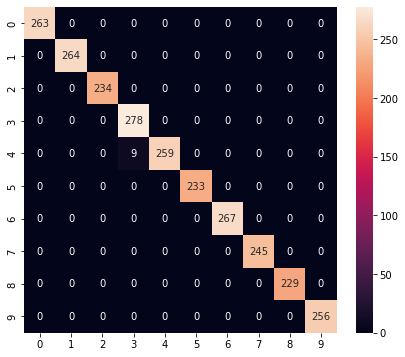

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       234
           3       0.97      1.00      0.98       278
           4       1.00      0.97      0.98       268
           5       1.00      1.00      1.00       233
           6       1.00      1.00      1.00       267
           7       1.00      1.00      1.00       245
           8       1.00      1.00      1.00       229
           9       1.00      1.00      1.00       256

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mfaja\AppData\Local\Temp\tmp81blh7cm\assets


INFO:tensorflow:Assets written to: C:\Users\mfaja\AppData\Local\Temp\tmp81blh7cm\assets


6836

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.8551307e-05 2.9225275e-06 5.5906716e-05 4.5755098e-07 1.8969700e-06
 2.2310676e-09 5.6975437e-06 1.8097952e-03 5.3505690e-18 9.9809474e-01]
9
